# Review Title Analysis

### Data Cleaning

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import sqlite3
from pyspark import SparkContext
sc =SparkContext()
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
import collections
import matplotlib.pyplot as plt
from matplotlib import pyplot as mp
%matplotlib inline

In [2]:
# Dependencies
import re, string

import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/janelchadiarova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/janelchadiarova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/janelchadiarova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Create connections to database
conn = sqlite3.connect("Data/Hotels.db")

#Load the database table into a pandas dataframe
ratings = pd.read_sql_query("select * from ratings;", conn)
conn.close()

# Preview the dataframe
ratings.head()

,index,name,reviews_date,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_userCity,reviews_userProvince
0,0,Rancho Valencia Resort Spa,2013-11-14T00:00:00Z,5.0,www.hotels.com,Our experience at Rancho Valencia was absolute...,Best romantic vacation ever!!!!,None,None
1,1,Rancho Valencia Resort Spa,2014-07-06T00:00:00Z,5.0,www.hotels.com,Amazing place. Everyone was extremely warm and...,Sweet sweet serenity,None,None
2,2,Rancho Valencia Resort Spa,2015-01-02T00:00:00Z,5.0,www.hotels.com,We booked a 3 night stay at Rancho Valencia to...,Amazing Property and Experience,None,None
3,3,Aloft Arundel Mills,2016-05-15T00:00:00Z,2.0,www.tripadvisor.com,Currently in bed writing this for the past hr ...,"Never again...beware, if you want sleep.",Richmond,VA
4,4,Aloft Arundel Mills,2016-07-09T00:00:00Z,5.0,www.tripadvisor.com,I live in Md and the Aloft is my Home away fro...,ALWAYS GREAT STAY...,Laurel,MD


In [4]:
#Grouping ratings to get 5 unique ratings
rating_list = ratings['reviews_rating'].tolist()
new_list = []
for rating in rating_list:
    if rating >= 5.0: 
        new_list.append(5.0)
    elif rating >= 4 and rating < 5:
        new_list.append(4.0)
    elif rating >= 3 and rating < 4:
        new_list.append(3.0)
    elif rating >= 2 and rating < 3:
        new_list.append(2.0)
    else:
        new_list.append(1.0)        

In [5]:
# Put all letters in lower case
# Split hotel reviews_rating to "good"/"bad"
ratings["reviews_title"] = ratings["reviews_title"].str.lower()
#ratings["rating"] = np.where(ratings["reviews_rating"]>= 4, 'good', 'bad')
ratings["rating"] = new_list
ratings['reviews_title'] = ratings['reviews_title'].astype(str)
ratings.head()

,index,name,reviews_date,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,rating
0,0,Rancho Valencia Resort Spa,2013-11-14T00:00:00Z,5.0,www.hotels.com,Our experience at Rancho Valencia was absolute...,best romantic vacation ever!!!!,None,None,5.0
1,1,Rancho Valencia Resort Spa,2014-07-06T00:00:00Z,5.0,www.hotels.com,Amazing place. Everyone was extremely warm and...,sweet sweet serenity,None,None,5.0
2,2,Rancho Valencia Resort Spa,2015-01-02T00:00:00Z,5.0,www.hotels.com,We booked a 3 night stay at Rancho Valencia to...,amazing property and experience,None,None,5.0
3,3,Aloft Arundel Mills,2016-05-15T00:00:00Z,2.0,www.tripadvisor.com,Currently in bed writing this for the past hr ...,"never again...beware, if you want sleep.",Richmond,VA,2.0
4,4,Aloft Arundel Mills,2016-07-09T00:00:00Z,5.0,www.tripadvisor.com,I live in Md and the Aloft is my Home away fro...,always great stay...,Laurel,MD,5.0


In [6]:
# Remove stop words from the list
stops = stopwords.words("english")
exclude = set(string.punctuation)

In [7]:
words_list = []
preprocessed_text = []
for review in ratings["reviews_title"]:
    
    # Create a list of words per rating after the words are converted to lowercase    
    words = word_tokenize(review)
    
    # Filter to remove stop words and punctuations    
    words2 = [word for word in words if word not in stops and word not in exclude]
    
    # Add the filtered list of words
    words_list.append(words2)
    
    # Convert the list of strings back to one string
    words3 = " ".join(words2)
    
    # Add the filtered list of words
    preprocessed_text.append(words3)
   
ratings["filtered_title"] = preprocessed_text
ratings.head()

,index,name,reviews_date,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,rating,filtered_title
0,0,Rancho Valencia Resort Spa,2013-11-14T00:00:00Z,5.0,www.hotels.com,Our experience at Rancho Valencia was absolute...,best romantic vacation ever!!!!,None,None,5.0,best romantic vacation ever
1,1,Rancho Valencia Resort Spa,2014-07-06T00:00:00Z,5.0,www.hotels.com,Amazing place. Everyone was extremely warm and...,sweet sweet serenity,None,None,5.0,sweet sweet serenity
2,2,Rancho Valencia Resort Spa,2015-01-02T00:00:00Z,5.0,www.hotels.com,We booked a 3 night stay at Rancho Valencia to...,amazing property and experience,None,None,5.0,amazing property experience
3,3,Aloft Arundel Mills,2016-05-15T00:00:00Z,2.0,www.tripadvisor.com,Currently in bed writing this for the past hr ...,"never again...beware, if you want sleep.",Richmond,VA,2.0,never ... beware want sleep
4,4,Aloft Arundel Mills,2016-07-09T00:00:00Z,5.0,www.tripadvisor.com,I live in Md and the Aloft is my Home away fro...,always great stay...,Laurel,MD,5.0,always great stay ...


In [8]:
# Remove columns that will not be used in the analysis
df = ratings.drop(columns=["reviews_text","reviews_date","reviews_sourceURLs","reviews_title","reviews_userCity","reviews_userProvince"],axis=1)
df.head()

,index,name,reviews_rating,rating,filtered_title
0,0,Rancho Valencia Resort Spa,5.0,5.0,best romantic vacation ever
1,1,Rancho Valencia Resort Spa,5.0,5.0,sweet sweet serenity
2,2,Rancho Valencia Resort Spa,5.0,5.0,amazing property experience
3,3,Aloft Arundel Mills,2.0,2.0,never ... beware want sleep
4,4,Aloft Arundel Mills,5.0,5.0,always great stay ...


## NLP - Natural Language Processing

In [9]:
#Convert Pandas DataFrame to Spark DataFrame
spark_ratings = sqlContext.createDataFrame(df)
spark_ratings.show(5)

+-----+--------------------+--------------+------+--------------------+
|index|                name|reviews_rating|rating|      filtered_title|
+-----+--------------------+--------------+------+--------------------+
|    0|Rancho Valencia R...|           5.0|   5.0|best romantic vac...|
|    1|Rancho Valencia R...|           5.0|   5.0|sweet sweet serenity|
|    2|Rancho Valencia R...|           5.0|   5.0|amazing property ...|
|    3| Aloft Arundel Mills|           2.0|   2.0|never ... beware ...|
|    4| Aloft Arundel Mills|           5.0|   5.0|always great stay...|
+-----+--------------------+--------------+------+--------------------+
only showing top 5 rows



In [10]:
# Create a length column to be used as a future feature 
from pyspark.sql.functions import length
data = spark_ratings.withColumn('length', length(spark_ratings['filtered_title']))
data.show(5)

+-----+--------------------+--------------+------+--------------------+------+
|index|                name|reviews_rating|rating|      filtered_title|length|
+-----+--------------------+--------------+------+--------------------+------+
|    0|Rancho Valencia R...|           5.0|   5.0|best romantic vac...|    27|
|    1|Rancho Valencia R...|           5.0|   5.0|sweet sweet serenity|    20|
|    2|Rancho Valencia R...|           5.0|   5.0|amazing property ...|    27|
|    3| Aloft Arundel Mills|           2.0|   2.0|never ... beware ...|    27|
|    4| Aloft Arundel Mills|           5.0|   5.0|always great stay...|    21|
+-----+--------------------+--------------+------+--------------------+------+
only showing top 5 rows



### Feature Transformations

In [11]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, StringIndexer

In [12]:
# Create all the features to the data set
pos_neg_to_num = StringIndexer(inputCol='rating',outputCol='label')
tokenizer = Tokenizer(inputCol="filtered_title", outputCol="token_text")
stopremove = StopWordsRemover(inputCol='token_text',outputCol='stop_tokens')
hashingTF = HashingTF(inputCol="stop_tokens", outputCol='hash_token',numFeatures=pow(2,4))
idf = IDF(inputCol="hash_token", outputCol="idf_token")

In [13]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector

# Create feature vectors
clean_up = VectorAssembler(inputCols=['label','idf_token', 'length'], outputCol='features')

In [14]:
# Create a and run a data processing Pipeline
from pyspark.ml import Pipeline
data_prep_pipeline = Pipeline(stages=[pos_neg_to_num, tokenizer, stopremove, hashingTF, idf, clean_up])

In [15]:
 # Fit and transform the pipeline
cleaner = data_prep_pipeline.fit(data)
cleaned = cleaner.transform(data)
cleaned.show(3)

+-----+--------------------+--------------+------+--------------------+------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|index|                name|reviews_rating|rating|      filtered_title|length|label|          token_text|         stop_tokens|          hash_token|           idf_token|            features|
+-----+--------------------+--------------+------+--------------------+------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+
|    0|Rancho Valencia R...|           5.0|   5.0|best romantic vac...|    27|  0.0|[best, romantic, ...|[best, romantic, ...|(16,[3,10,11],[2....|(16,[3,10,11],[2....|(18,[4,11,12,17],...|
|    1|Rancho Valencia R...|           5.0|   5.0|sweet sweet serenity|    20|  0.0|[sweet, sweet, se...|[sweet, sweet, se...|(16,[2,14],[1.0,2...|(16,[2,14],[1.992...|(18,[3,15,17],[1....|
|    2|Rancho Valencia R...|           5.0|   5.0|

In [16]:
# Show label of ham spame and resulting features
cleaned.select(['label', 'features']).show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|(18,[4,11,12,17],...|
|  0.0|(18,[3,15,17],[1....|
|  0.0|(18,[10,11,14,17]...|
|  3.0|(18,[0,1,10,15,16...|
|  0.0|(18,[1,2,5,6,17],...|
|  0.0|(18,[2,10,17],[1....|
|  0.0|(18,[4,11,17],[1....|
|  0.0|(18,[3,4,5,17],[1...|
|  0.0|(18,[2,5,15,17],[...|
|  0.0|(18,[1,11,12,17],...|
|  0.0|(18,[2,14,17],[1....|
|  0.0|(18,[1,6,7,16,17]...|
|  0.0|(18,[15,17],[1.89...|
|  0.0|(18,[4,9,13,17],[...|
|  0.0|(18,[10,17],[1.51...|
|  1.0|(18,[0,8,17],[1.0...|
|  0.0|(18,[2,10,17],[1....|
|  2.0|(18,[0,3,4,10,15,...|
|  0.0|(18,[1,4,6,7,10,1...|
|  1.0|(18,[0,2,10,17],[...|
+-----+--------------------+
only showing top 20 rows



In [17]:
from pyspark.ml.classification import NaiveBayes
# Break data down into a training set and a testing set
training, testing = cleaned.randomSplit([0.7, 0.3])

In [18]:
# Create a Naive Bayes model and fit training data
nb = NaiveBayes()
predictor = nb.fit(training)

In [19]:
# Tranform the model with the testing data
test_results = predictor.transform(testing)
test_results.show(3)

+-----+--------------------+--------------+------+--------------------+------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
|index|                name|reviews_rating|rating|      filtered_title|length|label|          token_text|         stop_tokens|          hash_token|           idf_token|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------+------+--------------------+------+-----+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------+
| 1006|Hotel Zetta San F...|           5.0|   5.0|great place great...|    38|  0.0|[great, place, gr...|[great, place, gr...|(16,[1,4,13,15],[...|(16,[1,4,13,15],[...|(18,[2,5,14,16,17...|[-42.428911089005...|[0.96487446241845...|       0.0|
| 1012|Hotel Zetta San F...|

In [20]:
# rating: 5 - 0.0, 4 - 1.0, 3 - 2.0, 2 - 3.0, 1 - 4.0
test_results.select(['label', 'prediction']).show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  1.0|       2.0|
|  3.0|       2.0|
|  0.0|       0.0|
|  3.0|       2.0|
|  3.0|       2.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  1.0|       1.0|
|  0.0|       0.0|
+-----+----------+
only showing top 10 rows



In [21]:
 # Use the Class Evaluator for a cleaner description
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

acc_eval = MulticlassClassificationEvaluator()
acc = acc_eval.evaluate(test_results)
print("Accuracy of model at predicting ratings was: ", acc)

Accuracy of model at predicting ratings was:  0.7707160418123743


## Popular Words 

In [22]:
df.head()

,index,name,reviews_rating,rating,filtered_title
0,0,Rancho Valencia Resort Spa,5.0,5.0,best romantic vacation ever
1,1,Rancho Valencia Resort Spa,5.0,5.0,sweet sweet serenity
2,2,Rancho Valencia Resort Spa,5.0,5.0,amazing property experience
3,3,Aloft Arundel Mills,2.0,2.0,never ... beware want sleep
4,4,Aloft Arundel Mills,5.0,5.0,always great stay ...


In [23]:
#Filtering Rating 5.0
filtered_5 = df[df['rating'] == 5.0]
list_filtered_5 = filtered_5["filtered_title"].tolist()
list_filtered_5_new = ''.join(list_filtered_5)
#Filtering Rating 4.0
filtered_4 = df[df['rating'] == 4.0]
list_filtered_4 = filtered_4["filtered_title"].tolist()
list_filtered_4_new = ''.join(list_filtered_4)
#Filtering Rating 3.0
filtered_3 = df[df['rating'] == 3.0]
list_filtered_3 = filtered_3["filtered_title"].tolist()
list_filtered_3_new = ''.join(list_filtered_3)
#Filtering Rating 2.0
filtered_2 = df[df['rating'] == 2.0]
list_filtered_2 = filtered_2["filtered_title"].tolist()
list_filtered_2_new = ''.join(list_filtered_2)
#Filtering Rating 1.0
filtered_1 = df[df['rating'] == 1.0]
list_filtered_1 = filtered_1["filtered_title"].tolist()
list_filtered_1_new = ''.join(list_filtered_1)

In [24]:
#Extending stop words list to avoid useless words 
stops_hotel = stopwords.words("english")
newStopWords = ["staygreat","hotelgreat", "n't", "", "one", "us","'s"]
stops_hotel.extend(newStopWords)

In [25]:
#Counting words for rating 5.0
wordcount5 = {}
for word in list_filtered_5_new.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stops_hotel:
        if word not in wordcount5:
            wordcount5[word] = 1
        else:
            wordcount5[word] += 1

sorted_by_value5 = sorted(wordcount5.items(), key=lambda kv: kv[1], reverse=True)[:10]
word_list5 = []
count_list5 = []
for element in sorted_by_value5:
    word_list5.append(element[0])
    count_list5.append(element[1])

In [26]:
#Counting words for rating 4.0
wordcount4 = {}
for word in list_filtered_4_new.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stops_hotel:
        if word not in wordcount4:
            wordcount4[word] = 1
        else:
            wordcount4[word] += 1
sorted_by_value4 = sorted(wordcount4.items(), key=lambda kv: kv[1], reverse=True)[:10]
word_list4 = []
count_list4 = []
for element in sorted_by_value4:
    word_list4.append(element[0])
    count_list4.append(element[1])

In [27]:
#Counting words for rating 3.0
wordcount3 = {}
for word in list_filtered_3_new.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stops_hotel:
        if word not in wordcount3:
            wordcount3[word] = 1
        else:
            wordcount3[word] += 1
sorted_by_value3 = sorted(wordcount3.items(), key=lambda kv: kv[1], reverse=True)[:10]
word_list3 = []
count_list3 = []
for element in sorted_by_value3:
    word_list3.append(element[0])
    count_list3.append(element[1])

In [28]:
#Counting words for rating 2.0
wordcount2 = {}
for word in list_filtered_2_new.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stops_hotel:
        if word not in wordcount2:
            wordcount2[word] = 1
        else:
            wordcount2[word] += 1
sorted_by_value2 = sorted(wordcount2.items(), key=lambda kv: kv[1], reverse=True)[:10]
word_list2 = []
count_list2 = []
for element in sorted_by_value2:
    word_list2.append(element[0])
    count_list2.append(element[1])

In [29]:
#Counting words for rating 1.0
wordcount1 = {}
for word in list_filtered_1_new.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stops_hotel:
        if word not in wordcount1:
            wordcount1[word] = 1
        else:
            wordcount1[word] += 1
sorted_by_value1 = sorted(wordcount1.items(), key=lambda kv: kv[1], reverse=True)[:10]
word_list1 = []
count_list1 = []
for element in sorted_by_value1:
    word_list1.append(element[0])
    count_list1.append(element[1])

In [30]:
#Creating DF for rating 5.0
df5 = pd.DataFrame(list(zip(word_list5, count_list5)), 
               columns =['word', 'count'])
df5['rating'] = '5.0'
#Creating DF for rating 4.0
df4 = pd.DataFrame(list(zip(word_list4, count_list4)), 
               columns =['word', 'count'])
df4['rating'] = '4.0'
#Creating DF for rating 3.0
df3 = pd.DataFrame(list(zip(word_list3, count_list3)), 
               columns =['word', 'count'])
df3['rating'] = '3.0'
#Creating DF for rating 2.0
df2 = pd.DataFrame(list(zip(word_list2, count_list2)), 
               columns =['word', 'count'])
df2['rating'] = '2.0'
#Creating DF for rating 1.0
df1 = pd.DataFrame(list(zip(word_list1, count_list1)), 
               columns =['word', 'count'])
df1['rating'] = '1.0'

In [31]:
frames = [df5, df4, df3, df2, df1]
df = pd.concat(frames)
df.head()

,word,count,rating
0,hotel,358,5.0
1,place,239,5.0
2,stay,225,5.0
3,great,223,5.0
4,location,130,5.0


## Data Visualisation

In [32]:
import seaborn as sns
from ipywidgets import widgets, interactive
from wordcloud import WordCloud
from PIL import Image

In [33]:
df_grouped = pd.DataFrame(df.groupby(["word", "rating"])["count"].mean())
df_grouped.head()

count
word     rating       
clean    3.0        20
         4.0        76
         5.0        62
customer 1.0        14
ever     1.0        16

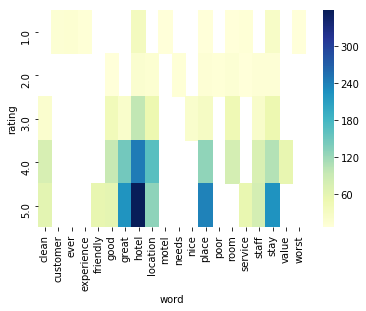

In [34]:
heat_map_data = df.pivot("rating",'word','count')
heat_map = sns.heatmap(heat_map_data, cmap="YlGnBu")

In [35]:
# Create a widget containing poem titles (sorted alphabetically)
ratings = list(df.rating.unique())
ratings.sort()

rating_title = widgets.Dropdown(options = ["Choose a rating..."] + ratings, value = "Choose a rating...", 
                              description = "rating:", disabled = False)

In [36]:
# Create a filter based on title
def plot_it(rating_title):
    if rating_title != "Choose a rating...":
        df1 = df[df["rating"] == rating_title]
        
        plt.figure(figsize = (10, 6))
        sns.set(font_scale = 1.5)
        graph = sns.barplot(y = "word", x = "count", data = df1, palette = "YlGnBu")

In [37]:
# Plot the data by poem title
interactive(plot_it, rating_title = rating_title)

interactive(children=(Dropdown(description='rating:', options=('Choose a rating...', '1.0', '2.0', '3.0', '4.0…

In [38]:
#world cloup preparation
wc_prep = df["word"].tolist()
wcloud_prep = ' '.join(wc_prep)

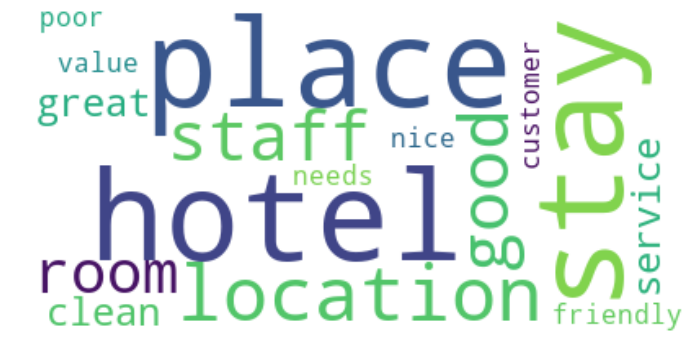

FileNotFoundError: [Errno 2] No such file or directory: '/WorldClouds/title_cloud.png'

<Figure size 432x288 with 0 Axes>

In [41]:
# Make the figure
wordcloud = WordCloud(background_color="white", contour_color='steelblue', min_font_size=16).generate(wcloud_prep)
plt.figure(figsize = (15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
mp.savefig('/WorldClouds/title_cloud.png')